## SCOTUS justices voting pattern

Here I compare the voting pattern of justices in the Roberts court (2005 to the 2017 term). Note that the 2017 term ends in June 2018. This data is publicly available at [SCOTUS database](http://scdb.wustl.edu/) provided by the Washington University of Law. Specifically, I looked at the [Modern Database:2018 Release 2--Justice Centered data](http://scdb.wustl.edu/_brickFiles/2018_02/SCDB_2018_02_justiceCentered_LegalProvision.csv.zip). For the purpose of this analysis, I only pay attention to the following attributes:

## Key attributes

### Chief justice:
The variable *chief* identifies the chief justice during whose tenure the case was decided.	The chief justices documented in this datasets are:
   * 1	Jay
   * 2	Rutledge
   * 3	Ellsworth
   * 4	Marshall
   * 5	Taney
   * 6	Chase
   * 7	Waite
   * 8	Fuller
   * 9	White
   * 10	Taft
   * 11	Hughes
   * 12	Stone
   * 13	Vinson
   * 14	Warren
   * 15	Burger
   * 16	Rehnquist
   * 17	Roberts

### Vote
Encoded in the variable named *vote* that takes value between 1 and 8 with the following meaning.
   * 1: voted with majority or plurality
   * 2: dissent
   * 3: regular concurrence
   * 4: special concurrence
   * 5: judgment of the Court
   * 6: dissent from a denial or dismissal of certiorari , or dissent from summary affirmation of an appeal
   * 7: jurisdictional dissent
   * 8: justice participated in an equally divided vote

Note that for the purpose the following anaysis, I aggregated case 1, 3, 4, 5 into a single variable *1* indicating majority while 2,6,7 into *2* indicating dissent. I left case 8 unspecified due to the ambiguity detailed in the documentation of this database. Note that a regular concurrence is when the justice agrees with the Court's opinion as well as its disposition. A special concurence (i.e., a concurence in the judgment) is when the justice agrees with the Court's disposition but not its opinion. A jurisdictional dissent is when the justice disagrees with the Court's assertion or denial of jurisdiction. Such votes are counted as nonparticipations. 

### Case name:
Encoded in the variable named *caseName* which is of string type.


### Justice name:
Encoded in the variable named *justiceName*. In the following analysis, I focused on the Roberts' court (2005 to present). Although some currently sitting justices were also part of Rehnquist's count, those tend to have less overlap with others on the Robert's court. For this reason, I choose Robert's court for the analysis. Among these, I purged Justice J.P. Stevens and S.D. O'Connor since they have little overlap with currently sitting ones. This boils down to the following justices: 

 'AScalia', 'AMKennedy', 'DHSouter',
       'CThomas', 'RBGinsburg', 'SGBreyer', 'JGRoberts', 'SAAlito',
       'SSotomayor', 'EKagan', 'NMGorsuch'

Note that justice B.M. Kavanaugh is not included in this dataset since it only contains up to the 2017-2018 term, with the last case named *SEXTON v. BEAUDREAUX* decided on June 28, 2018

### Case area:

Vaiable *issueArea* categorizes the case into the following sometime over- and under-specified areas.

   * 1: Criminal procedure
   * 2: Civil rights
   * 3: First Amendment
   * 4: Due process
   * 5: Privacy
   * 6: Attorneys' or governmental officials' fees or compensation
   * 7: Unions
   * 8: Economic activity
   * 9: Judicial power
   * 10: Federalism
   * 11: Interstate relation
   * 12: Federal taxation
   * 13: Miscellaneous
   * 14: Private law

By trimming the dataset down to the Roberts count and keep only attributes mentioned above plus some metadata (e.g. case decision date, whether the case declared the case being heard unconstitutional etc.), I got the dataset named *SCDB_2018_02_Roberts_new.csv*. You can download this trimmed dataset from my [Dropbox](https://www.dropbox.com/s/0makeeadk3pwvdh/SCDB_2018_02_Roberts_new.csv?dl=0).

In [1]:
import pandas as pd
import seaborn as sns
import chardet
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline




dfr = pd.read_csv('SCDB_2018_02_Roberts_new.csv', encoding = 'Latin-1')

def make_fig(df, area):
    
    corr = df.corr()
    fig = plt.figure()
    if area == 1:
        title_str = 'Criminal_Procedure'
    elif area == 2:
        title_str = 'Civil_Rights'
    elif area == 3:
        title_str = '1st_Amendment'
    elif area == 4:
        title_str = 'Due_Process'
    elif area == 5:
        title_str = 'Privacy'
    elif area == 6:
        title_str = 'Attorneys'
    elif area == 7:
        title_str = 'Unions'
    elif area == 8:
        title_str = 'Economic_Activity'
    elif area == 9:
        title_str = 'Judicial_Power'
    elif area == 10:
        title_str = 'Federalism'
    elif area == 11:
        title_str = 'Interstate_Relations'
    elif area == 12:
        title_str = 'Federal_Taxation'
    elif area == 13:
        title_str = 'Miscellaneous'
    elif area == 14:
        title_str = 'Private_action'
    else:
        title_str = 'Others' 
    
    title_str = 'corr_' + title_str
    sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, cmap="YlGnBu")
    plt.title(title_str, fontsize = 14)
    fig.savefig(title_str + '.pdf',bbox_inches='tight')
    fig.savefig(title_str + '.png',bbox_inches='tight')

In [2]:
justice = dfr.justiceName.unique()
justice

array(['JPStevens', 'SDOConnor', 'AScalia', 'AMKennedy', 'DHSouter',
       'CThomas', 'RBGinsburg', 'SGBreyer', 'JGRoberts', 'SAAlito',
       'SSotomayor', 'EKagan', 'NMGorsuch'], dtype=object)

In [4]:
#Here purge JPStevens and SDOConnor
justice = np.array(['AScalia', 'AMKennedy','CThomas', 'RBGinsburg', 'SGBreyer', 
                    'JGRoberts', 'SAAlito','SSotomayor', 'EKagan', 'NMGorsuch'], dtype=object)
case = dfr.caseName.unique()
area = dfr.issueArea.unique()
area

array([ 1.,  2.,  9.,  7.,  8.,  6., 10.,  5.,  3., 11.,  4., 12., nan,
       13., 14.])

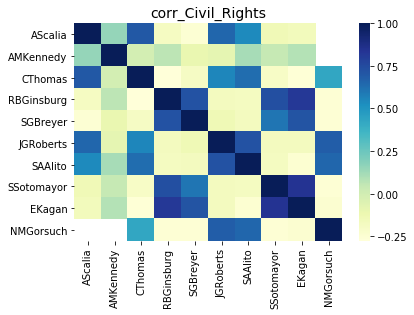

In [5]:
# To choose one particular area, one can just specify it as an array: e.g. civial rights
area = np.array([2])
for are in area:
    df = pd.DataFrame(np.zeros([case.shape[0], justice.shape[0]]), columns=list(justice), index = list(case))
    for jus in justice:
        for cas in case:
            entry = (dfr['justiceName'] == jus) & (dfr['caseName'] == cas) & (dfr['issueArea'] == are)
            s= dfr.loc[entry,'vote']
            if s.shape[0] == 0:
                df.loc[cas, jus] =  float('nan')
            else:
                if s.iloc[0] == 1 or s.iloc[0] ==3 or s.iloc[0] ==4 or s.iloc[0] ==5:
                    df.loc[cas, jus] = 1
                elif s.iloc[0] == 2 or s.iloc[0] == 6 or s.iloc[0] == 7:
                    df.loc[cas, jus] = 2
                else:
                    df.loc[cas, jus] = float('nan')
    make_fig(df, are)


One can also show the aggregated result by not specifying the issueArea:

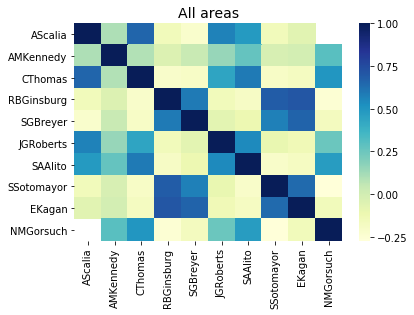

In [7]:
for jus in justice:
    for cas in case:
        entry = (dfr['justiceName'] == jus) & (dfr['caseName'] == cas)
        s= dfr.loc[entry,'vote']
        if s.shape[0] == 0:
            df.loc[cas, jus] =  float('nan')
        else:
            if s.iloc[0] == 1 or s.iloc[0] ==3 or s.iloc[0] ==4 or s.iloc[0] ==5:
                df.loc[cas, jus] = 1
            elif s.iloc[0] == 2 or s.iloc[0] == 6 or s.iloc[0] == 7:
                df.loc[cas, jus] = 2
            else:
                df.loc[cas, jus] = float('nan')
                
corr = df.corr()
fig = plt.figure()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")
plt.title('All areas', fontsize = 14)
fig.savefig('corr.pdf',bbox_inches='tight')
fig.savefig('corr.png',bbox_inches='tight')            

One can also visualize the dataset used to calculate the correlation matrix and save it as an csv file for future convenience: 

In [8]:
df
df.to_csv('SCDB_2018_02_Roberts_vote.csv', index=False)